In [1]:
%pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")

read the data

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.shape

(200, 5)

In [7]:
# check missing values
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# check duplicates values
df.duplicated().sum()

0

In [9]:
# rename column names
df=df.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spend'})

In [10]:
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

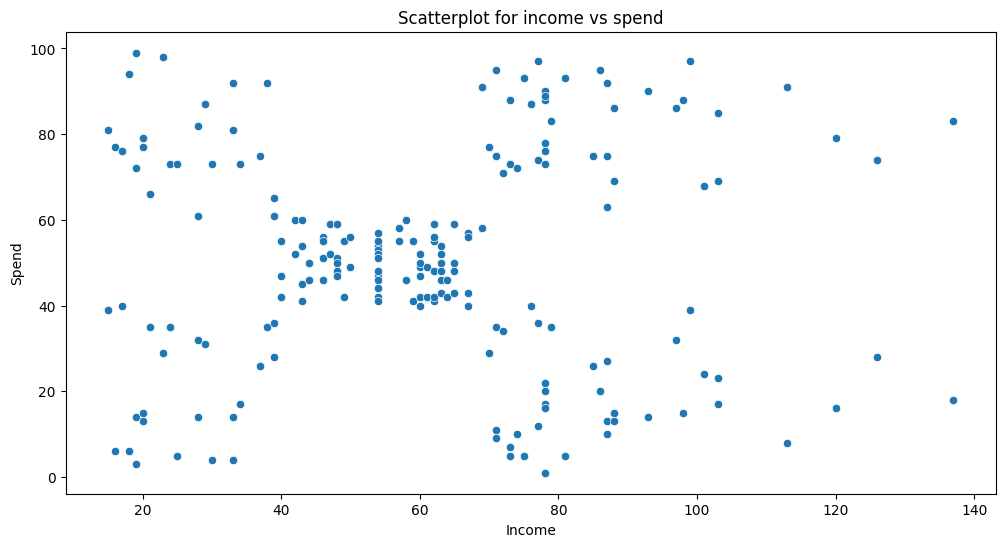

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x="Income",y="Spend")
plt.title("Scatterplot for income vs spend")
plt.show()

seperate x values in df

In [13]:
x=df[['Income','Spend']]
x.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Preprocessing x 

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [15]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())]).set_output(transform="pandas")

In [16]:
x_pre=num_pipe.fit_transform(x)
x_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


Find best value of k

In [18]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

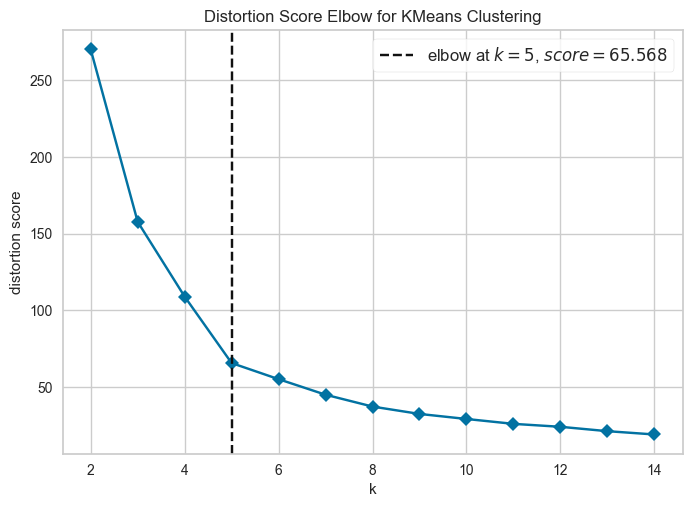

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [19]:
kelbow_visualizer(KMeans(),
                  x_pre,
                  k=(2,15),
                  timings=False)

In [20]:
model=KMeans(n_clusters=5)
model.fit(x_pre)

KMeans(n_clusters=5)

In [21]:
model.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [22]:
x['Label']=model.labels_

In [23]:
x.head()

,Income,Spend,Label
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1


In [27]:
for i in range(5):
    print(f"cluster number:{i}\n")
    display(x[x['Label']==i])
    print("\n###################################\n")

cluster number:0



,Income,Spend,Label
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0
141,75,93,0



###################################

cluster number:1



,Income,Spend,Label
0,15,39,1
2,16,6,1
4,17,40,1
6,18,6,1
8,19,3,1
10,19,14,1
12,20,15,1
14,20,13,1
16,21,35,1
18,23,29,1



###################################

cluster number:2



,Income,Spend,Label
43,39,61,2
46,40,55,2
47,40,47,2
48,40,42,2
49,40,42,2
...,...,...,...
121,67,40,2
122,69,58,2
126,71,35,2
132,72,34,2



###################################

cluster number:3



,Income,Spend,Label
124,70,29,3
128,71,11,3
130,71,9,3
134,73,5,3
136,73,7,3
138,74,10,3
140,75,5,3
144,77,12,3
146,77,36,3
148,78,22,3



###################################

cluster number:4



,Income,Spend,Label
1,15,81,4
3,16,77,4
5,17,76,4
7,18,94,4
9,19,72,4
11,19,99,4
13,20,77,4
15,20,79,4
17,21,66,4
19,23,98,4



###################################



Visualize above clusters

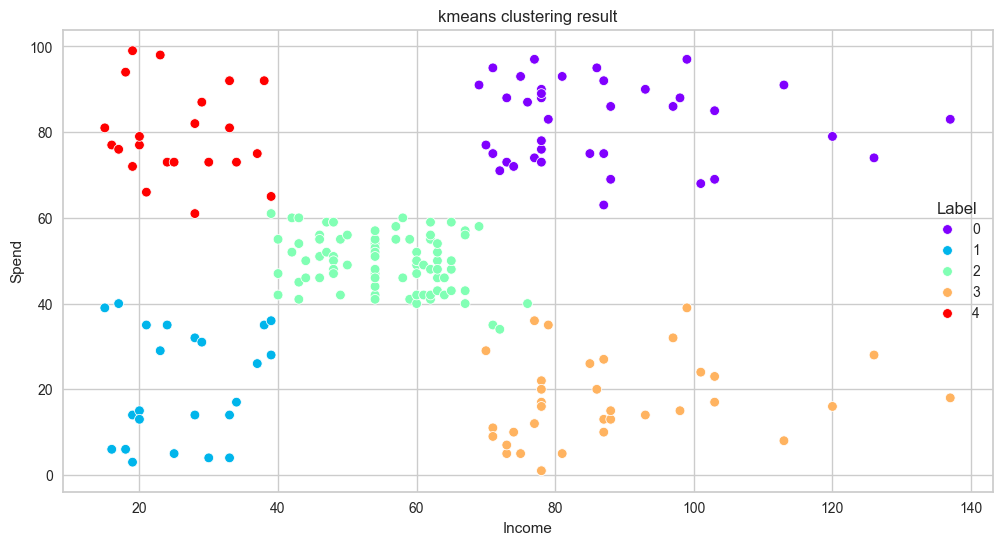

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=x,x='Income',y='Spend',hue="Label",palette="rainbow")
plt.title("kmeans clustering result")
plt.show()

group customers on the basis of age,income,spending

In [31]:
x2=df[["Age","Income","Spend"]]
x2.head()

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Create data preprocessing pipeline


In [32]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy="median")),
                          ('scaler',StandardScaler())]).set_output(transform="pandas")

In [33]:
x_pre2=num_pipe2.fit_transform(x2)
x_pre2.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


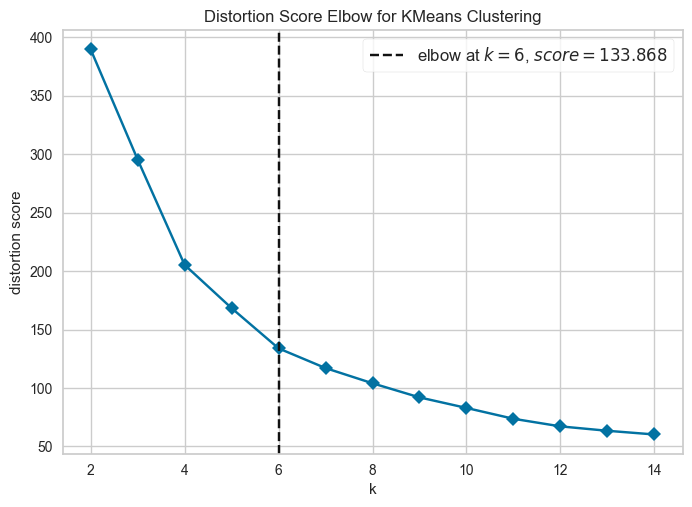

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [34]:
kelbow_visualizer(KMeans(),
                  x_pre2,
                  k=(2,15),
                  timings=False)

In [35]:
model2=KMeans(n_clusters=6)
model2.fit(x_pre2)

KMeans(n_clusters=6)

In [36]:
model2.labels_

array([0, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2, 0, 5, 0,
       5, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 3, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [37]:
x2["Label"]=model2.labels_

In [38]:
x2.head()

,Age,Income,Spend,Label
0,19,15,39,0
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5


In [40]:
for i in range(6):
    print(f"cluster number:{i}\n")
    display(x2[x2['Label']==i])
    print("\n###################################\n")

cluster number:0



,Age,Income,Spend,Label
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0



###################################

cluster number:1



,Age,Income,Spend,Label
126,43,71,35,1
128,59,71,11,1
130,47,71,9,1
134,20,73,5,1
136,44,73,7,1
140,57,75,5,1
144,25,77,12,1
146,48,77,36,1
148,34,78,22,1
150,43,78,17,1



###################################

cluster number:2



,Age,Income,Spend,Label
40,65,38,35,2
46,50,40,55,2
50,49,42,52,2
53,59,43,60,2
54,50,43,45,2
55,47,43,41,2
56,51,44,50,2
57,69,44,46,2
59,53,46,46,2
60,70,46,56,2



###################################

cluster number:3



,Age,Income,Spend,Label
47,27,40,47,3
48,29,40,42,3
49,31,40,42,3
51,33,42,60,3
52,31,43,54,3
58,27,46,51,3
61,19,46,55,3
65,18,48,59,3
68,19,48,59,3
69,32,48,47,3



###################################

cluster number:4



,Age,Income,Spend,Label
123,39,69,91,4
125,31,70,77,4
127,40,71,95,4
129,38,71,75,4
131,39,71,75,4
133,31,72,71,4
135,29,73,88,4
137,32,73,73,4
139,35,74,72,4
141,32,75,93,4



###################################

cluster number:5



,Age,Income,Spend,Label
2,20,16,6,5
4,31,17,40,5
6,35,18,6,5
8,64,19,3,5
10,67,19,14,5
12,58,20,15,5
14,37,20,13,5
16,35,21,35,5
18,52,23,29,5
20,35,24,35,5



###################################

